## Importar librerías

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import math
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go



## Importar datos

In [3]:
df = pd.read_csv('datos_limpios.csv')
df.job_level = df.job_level.astype(str)
df.stock_option_level = df.stock_option_level.astype(str)
df.training_times_last_year = df.training_times_last_year.astype(str)
df.columns

Index(['employee_id', 'age', 'attrition', 'business_travel', 'department',
       'distance_from_home', 'education', 'education_field', 'gender',
       'job_level', 'job_role', 'marital_status', 'monthly_income',
       'num_companies_worked', 'percent_salary_hike', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'years_at_company',
       'years_since_last_promotion', 'years_with_curr_manager',
       'environment_satisfaction', 'job_satisfaction', 'work_life_balance',
       'job_involvement', 'performance_rating', 'mean_time'],
      dtype='object')

In [24]:
df['distance_from_home'].dtype

dtype('int64')

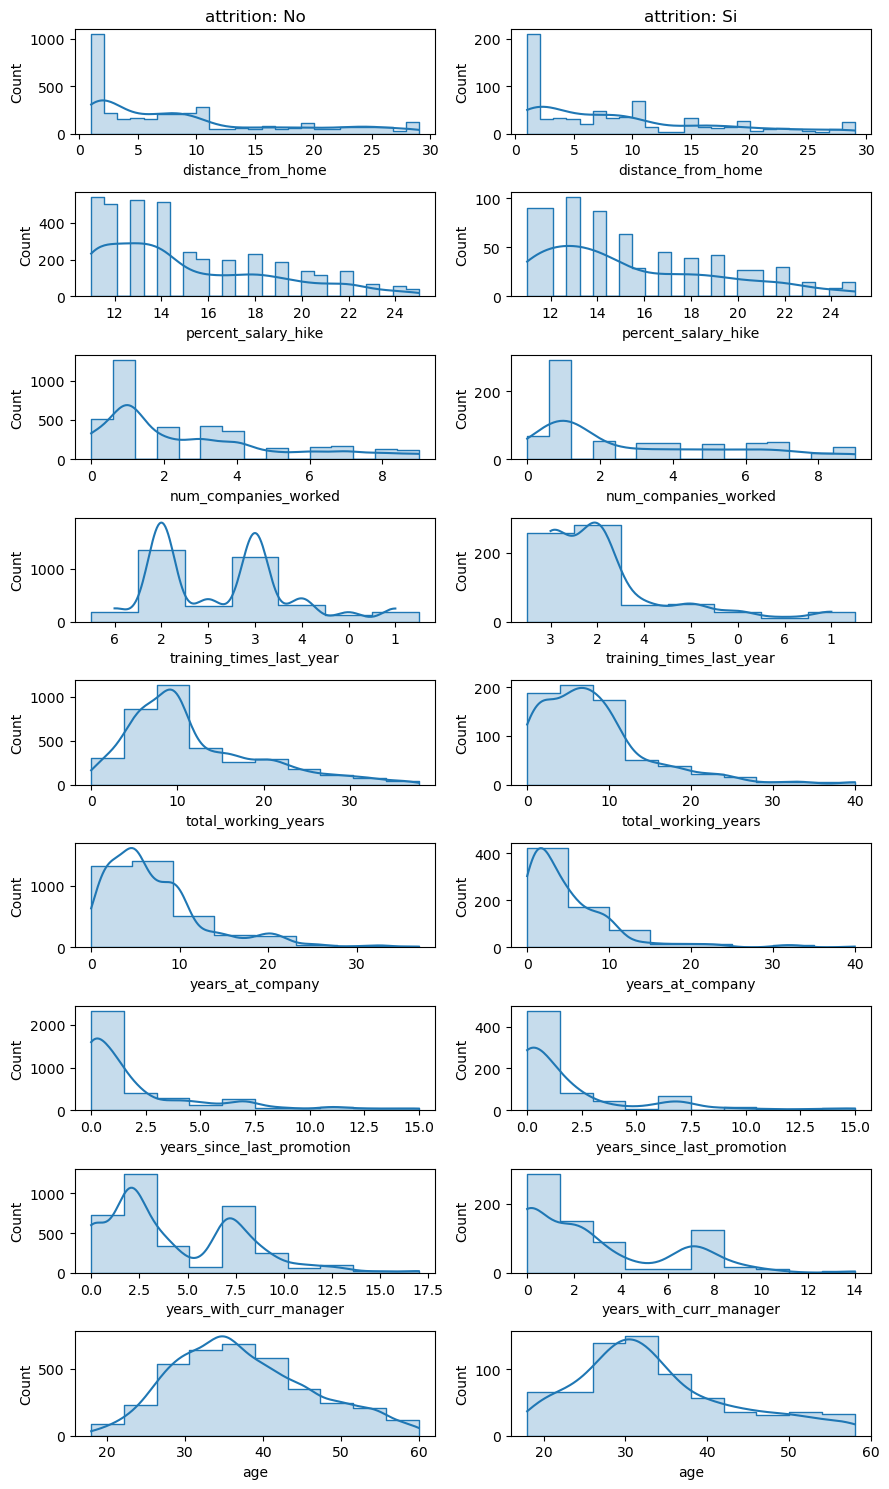

In [18]:
time_feat = df.loc[:, df.columns.str.contains('Years')].columns.values.tolist() + ['Age']  # Variables de tiempo

numerical_feat = ['distance_from_home', 'percent_salary_hike', 'num_companies_worked', 
                  'training_times_last_year', 'total_working_years', 'years_at_company', 
                  'years_since_last_promotion', 'years_with_curr_manager', 'age']                     # Variables numerica

continuos_feat = df[[i for i in df if df[i].nunique( ) > 100]].columns.values.tolist()     # Variables numericas continuas

# Variables categoricas
categorical_feat = df.columns.values[~np.isin(df.columns.values.tolist(), continuos_feat+numerical_feat)].tolist()

# Lista con todas las variables numericas
ndata =  numerical_feat

# Histograma para las variables numericas continuas

fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(9,15))

bins = [25]*2 + [15]*2 + [10] + [8] + [10]*3 + [10] + [25]


for i,j,k,b in zip(axes, [df['attrition'].unique()]*11, ndata, bins):

    sns.histplot(ax=i[0], data=df[df['attrition'] == j[0]], x=k, bins=b, kde=True, hue='attrition', element="step", legend=None)
    sns.histplot(ax=i[1], data=df[df['attrition'] == j[1]], x=k, bins=b, kde=True, hue='attrition', element="step", legend=None)

axes[0][0].set_title('attrition: No')
axes[0][1].set_title('attrition: Si')
plt.tight_layout()
plt.show()

In [15]:
# Boxplots para las variables numericas para identificar valores atipicos



data = df[numerical_feat].copy()
_ = ndata.copy()

for z in range(3):
    cols = 3
    rows = 1
    fig = make_subplots(cols=cols, rows=rows)

    for j,k in zip(range(1, cols+1), _[0:cols]):

        _.remove(k)

        fig.add_trace(go.Box(y=data[k], boxpoints='outliers',
                            fillcolor='blue', jitter=0.5,
                            whiskerwidth=0.2, name=k, width=800), row=1, col=j)
    fig.show()

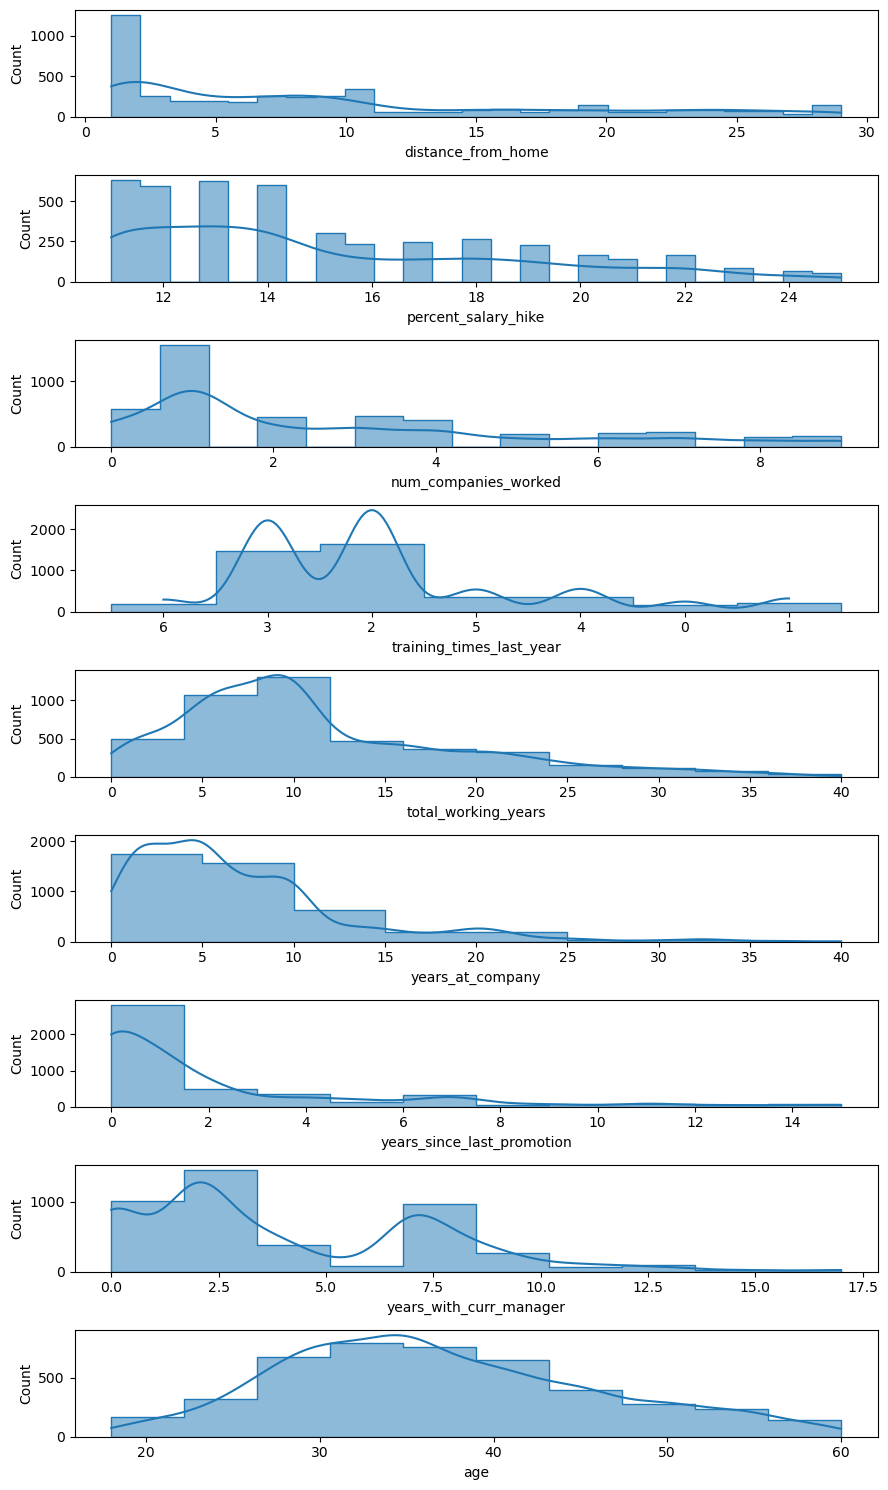

In [21]:
time_feat = df.loc[:, df.columns.str.contains('Years')].columns.values.tolist() + ['Age']  # Variables de tiempo

numerical_feat = ['distance_from_home', 'percent_salary_hike', 'num_companies_worked', 
                  'training_times_last_year', 'total_working_years', 'years_at_company', 
                  'years_since_last_promotion', 'years_with_curr_manager', 'age']                     # Variables numerica

continuos_feat = df[[i for i in df if df[i].nunique() > 100]].columns.values.tolist()     # Variables numericas continuas

# Variables categoricas
# categorical_feat = df.columns.values[~np.isin(df.columns.values.tolist(), continuos_feat+numerical_feat)].tolist()

# Lista con todas las variables numericas
ndata =  numerical_feat

# Histograma para las variables numericas continuas

fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(9,15))

bins = [25]*2 + [15]*2 + [10] + [8] + [10]*3 + [10] + [25]


for i,k,b in zip(axes,ndata, bins):

#     sns.histplot(ax=i[0], data=df[df['attrition'] == j[0]], x=k, bins=b, kde=True, hue='attrition', element="step", legend=None)
    sns.histplot(ax=i, data=df, x=k, bins=b, kde=True, element="step", legend=None)

# axes[0][0].set_title('attrition: No')
# axes[0][1].set_title('attrition: Si')
plt.tight_layout()
plt.show()

In [30]:
cor=df[numerical_feat].corr()
cor.style.background_gradient(axis=None)

C:\Users\opaac\AppData\Local\Temp\ipykernel_14228\1318587652.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,distance_from_home,percent_salary_hike,num_companies_worked,total_working_years,years_at_company,years_since_last_promotion,years_with_curr_manager,age
distance_from_home,1.000000,0.038667,-0.014119,0.009374,0.030874,0.002380,0.021258,0.006772
percent_salary_hike,0.038667,1.000000,0.030266,-0.018736,-0.029449,-0.028727,-0.040563,-0.032711
num_companies_worked,-0.014119,0.030266,1.000000,0.238726,-0.116745,-0.035525,-0.108913,0.299152
total_working_years,0.009374,-0.018736,0.238726,1.000000,0.627703,0.404444,0.458800,0.680661
years_at_company,0.030874,-0.029449,-0.116745,0.627703,1.000000,0.618367,0.769385,0.311342
years_since_last_promotion,0.002380,-0.028727,-0.035525,0.404444,0.618367,1.000000,0.510637,0.216452
years_with_curr_manager,0.021258,-0.040563,-0.108913,0.458800,0.769385,0.510637,1.000000,0.201996
age,0.006772,-0.032711,0.299152,0.680661,0.311342,0.216452,0.201996,1.000000


In [32]:
for i in numerical_feat:
    display(df[i].describe().to_frame())

,distance_from_home
count,4401.000000
mean,9.190184
std,8.102578
min,1.000000
25%,2.000000
50%,7.000000
75%,14.000000
max,29.000000


,percent_salary_hike
count,4401.000000
mean,15.207453
std,3.659222
min,11.000000
25%,12.000000
50%,14.000000
75%,18.000000
max,25.000000


,num_companies_worked
count,4401.000000
mean,2.690298
std,2.492848
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,9.000000


,training_times_last_year
count,4401
unique,7
top,2
freq,1637


,total_working_years
count,4401.000000
mean,11.279936
std,7.782222
min,0.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,40.000000


,years_at_company
count,4401.000000
mean,7.003636
std,6.123315
min,0.000000
25%,3.000000
50%,5.000000
75%,9.000000
max,40.000000


,years_since_last_promotion
count,4401.000000
mean,2.188366
std,3.221407
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,15.000000


,years_with_curr_manager
count,4401.000000
mean,4.122927
std,3.568056
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,17.000000


,age
count,4401.000000
mean,36.920473
std,9.139377
min,18.000000
25%,30.000000
50%,36.000000
75%,43.000000
max,60.000000
